<a href="https://colab.research.google.com/github/SumanSDey/Solving-Business-Problems/blob/Developing-a-Recommender-System/Netflix_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import plotly.express as px

In [ ]:

import pandas as pd
from google.colab import drive


filename = '/content/drive/MyDrive/netflix_data.csv'
df = pd.read_csv(filename)

df.head()


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,show_id,title,description,director,generes,cast,country,release_year,rating,duration,Imdb Score,type,date_added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,8-Sep-20
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,1-Jul-20
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,5-Feb-20


In [ ]:
# Checking null values
df.isnull().sum()

show_id            0
title              0
description        0
director        2064
generes            0
cast             530
country          559
release_year       3
rating             4
duration           3
Imdb Score       608
type               0
date_added      1335
dtype: int64

## Data Cleaning step

Our dataframe has some missing steps as is evident from the above cell.
The following few steps will deal with them.

In [ ]:
df['director'].replace(np.nan,"Unknown",inplace=True)
df['cast'].replace(np.nan,"Unknown",inplace=True)
df.isnull().sum()

show_id            0
title              0
description        0
director           0
generes            0
cast               0
country          559
release_year       3
rating             4
duration           3
Imdb Score       608
type               0
date_added      1335
dtype: int64

We will replace them by United States, since United States has the largest nummber of shows.

In [ ]:
df['country'].value_counts().to_frame().head(1)

,count
country,
United States,1792


In [ ]:
df['country'].replace(np.nan,"United States",inplace=True)

In [ ]:
df['Imdb Score'].replace(np.nan,"7",inplace=True)
df['duration'].replace(np.nan,"Unknown",inplace=True)
df['release_year'].replace(np.nan,"Unknown",inplace=True)
df.isnull().sum()

show_id            0
title              0
description        0
director           0
generes            0
cast               0
country            0
release_year       0
rating             4
duration           0
Imdb Score         0
type               0
date_added      1335
dtype: int64

In [ ]:
df['date_added'].value_counts().to_frame().head(1)

,count
date_added,
2-Jun-21,69


Now, only the 'date_added' column is left to be treated. We see that most of the showa were added in 2021, so replacing missing values with 2021.

In [ ]:
df['date_added'].replace(np.nan,"2-Jun-21",inplace=True)

We need releasing month for visualizing our data, separating the month from the date_added column, creating a new column for release months only and concat it to our dataframe.

In [ ]:

# Assuming 'date_added' can have 'date/month/year' or 'dd-mm-yy' format
def extract_month(date_str):
  try:
    # Try extracting month from 'date/month/year' format
    month = date_str.split("/")[1]
  except IndexError:
    try:
      # If split fails, try extracting month from 'dd-mm-yy' format
      month = date_str.split("-")[1]
    except IndexError:
      # Handle cases where the format is not supported
      month = "NA"
  return month

df['release_month'] = df['date_added'].apply(extract_month)



In [ ]:

df.head()


,show_id,title,description,director,generes,cast,country,release_year,rating,duration,Imdb Score,type,date_added,release_month
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Unknown,Reality TV,Unknown,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,2-Jun-21,Jun
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,8-Sep-20,Sep
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,1-Jul-20,Jul
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,Unknown,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,2-Jun-21,Jun
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",Unknown,Canada,2020.0,TV-14,90 min,5.1/10,Movie,5-Feb-20,Feb


In [ ]:
# Working out the 'rating' column

df["rating"].isnull().sum()

4

In [ ]:
df['rating'].value_counts().to_frame().head(1)

,count
rating,
TV-MA,2541


Replacing the null values with TV-MA since they make up the most amount of Ratings.

In [ ]:
 df["rating"].replace(np.nan,"TV-MA",inplace=True)
df.isnull().sum()

show_id          0
title            0
description      0
director         0
generes          0
cast             0
country          0
release_year     0
rating           0
duration         0
Imdb Score       0
type             0
date_added       0
release_month    0
dtype: int64

So, we have finally eliminated all null values.


Adding season_count and duration features since they are important for visualizing our data.

In [ ]:
# Count the seasons and create a new column.
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['season_count'] = pd.to_numeric(df['season_count'],errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['season_count'] = pd.to_numeric(df['season_count'], downcast ='signed')

# Replace duration column with just the number of minutes.
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df['duration'] = pd.to_numeric(df['duration'],errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['duration'] = pd.to_numeric(df['duration'], downcast ='signed')


In [ ]:
df.head(10)

,show_id,title,description,director,generes,cast,country,release_year,rating,duration,Imdb Score,type,date_added,release_month,season_count
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Unknown,Reality TV,Unknown,United States,2020.0,TV-MA,0,6.6/10,TV Show,2-Jun-21,Jun,1
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99,6.2/10,Movie,8-Sep-20,Sep,0
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95,6.4/10,Movie,1-Jul-20,Jul,0
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,Unknown,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,0,6.6/10,TV Show,2-Jun-21,Jun,1
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",Unknown,Canada,2020.0,TV-14,90,5.1/10,Movie,5-Feb-20,Feb,0
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102,7.0/10,Movie,21-May-20,May,0
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104,7.0/10,Movie,28-Jun-20,Jun,0
7,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99,5.1/10,Movie,8-Sep-17,Sep,0
8,8b34e0e9-7258-4e49-b799-2e7eddbd7e34,#Rucker50,This documentary celebrates the 50th anniversa...,Robert McCullough Jr.,"Documentaries, Sports Movies",Unknown,United States,2016.0,TV-PG,56,5.1/10,Movie,1-Dec-16,Dec,0
9,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...",Cristina Jacob,"Comedies, Dramas, International Movies","Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2014.0,TV-MA,125,5.8/10,Movie,21-Jun-21,Jun,0


## Visualizing the Data

type
Movie      3867
TV Show    2100
Name: count, dtype: int64


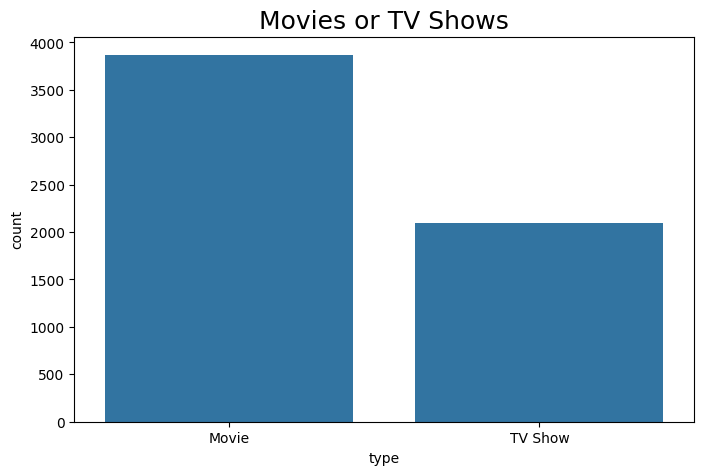

In [ ]:
# Total count of Movies & TV shows
print(df['type'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x='type', data= df, order= df.type.value_counts().index[0:2])
plt.title('Movies or TV Shows', size=18);

From the above graph, we see, the number of movies released on Netflix is almost double the number of TV shows.

In [ ]:
# Create a DataFrame showing the top 10 release years and their counts
release_year_counts = df['release_year'].value_counts()[:10].reset_index()  # Reset index to create separate columns

# Create the pie chart
fig = px.pie(release_year_counts, values='release_year', names='release_year', labels='release_year')

# Update layout and traces
fig.update_layout(title="Pie Chart for Distribution of Content based on Year Released")
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()


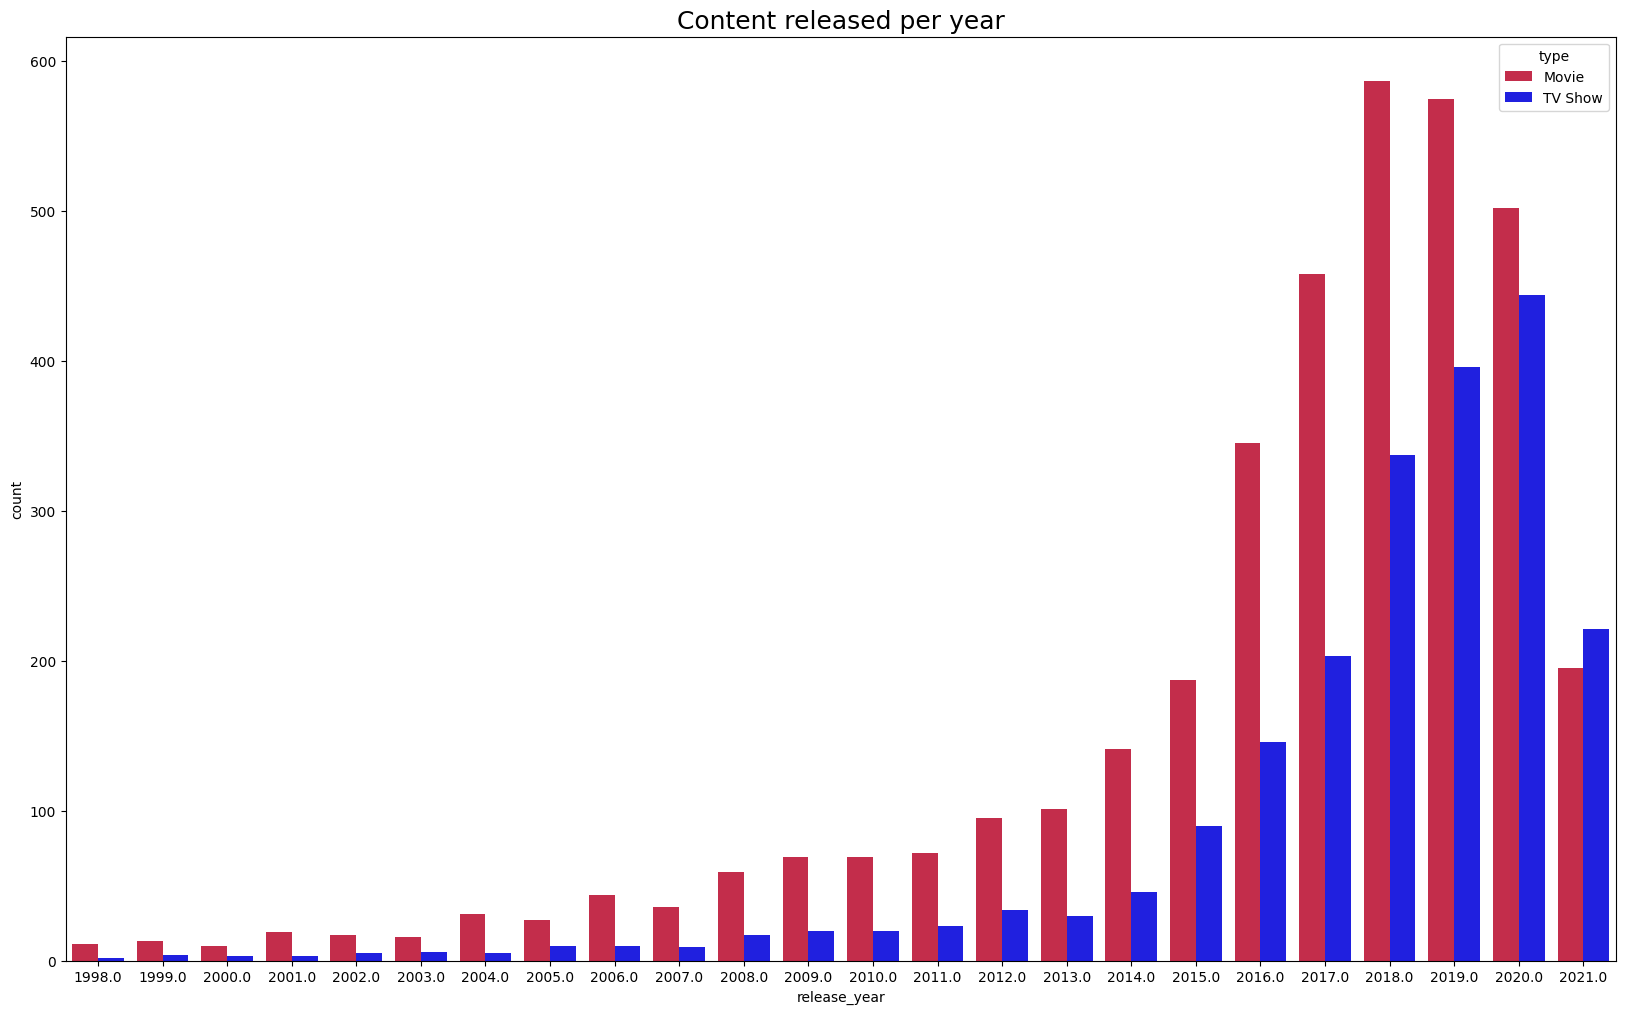

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'release_year' is already sorted in descending order
# (if not, use the sorting code from previous responses)

# Create the countplot with custom colors
plt.figure(figsize=(20, 12))
palette = ['crimson', 'blue']  # Define a list of colors (can be customized)
sns.countplot(x='release_year', hue='type', data=df.sort_values(by='release_year')[-1:200:-1], palette=palette);
plt.title('Content released per year', size=18);

plt.show()


We see that 2013 onwards till 2018, there was an exponential rise in movies releasing on Netflix. This can be attributed to the introduction of high speed 4G internet connectivity that made streaming using cellular network as fast as using broadband. The abrupt rise in the movies' graph in 2016 might be due to introduction of cheap & high speed 4G connection in the biggest emerging economy (India) & Netflix getting the huge market open to streaming!

The same reason goes for TV shows as well.

Top  1  country/countries with most content: {'United States': 2351}


<ipython-input-23-b52467978a9e>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




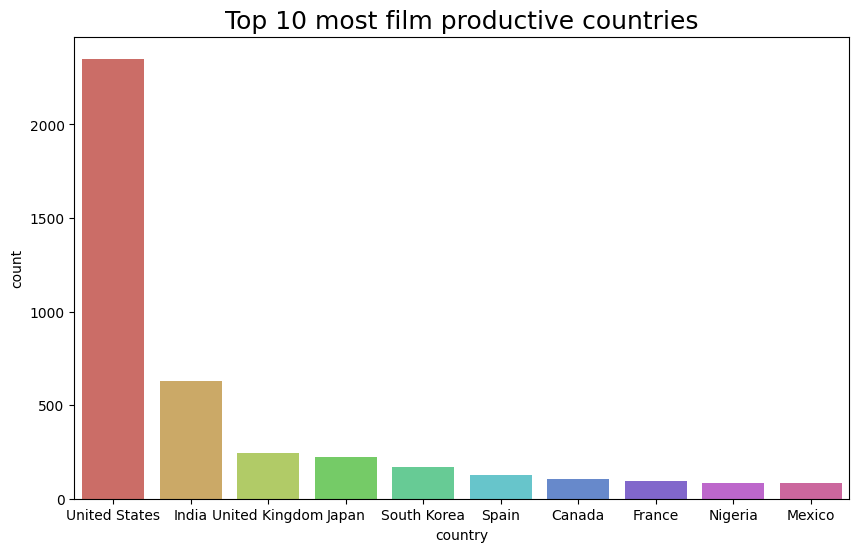

In [ ]:
def return_counter(data_frame, column_name, limit):
  print('Top ', limit, ' country/countries with most content:', dict(Counter(data_frame[column_name].values).most_common(limit)))

return_counter(df, 'country', 1)

## Frequency graph by country with multi-color bars (smaller size)
plt.figure(figsize=(10, 6))  # Adjust width and height as desired

# Generate a custom color palette (optional)
palette = sns.color_palette("hls", len(df['country'].value_counts().index[:10]))  # Adjust length as needed

# Create the countplot with the color palette
sns.countplot(x='country', data=df, order=df.country.value_counts().index[0:10], palette=palette)
plt.title('Top 10 most film productive countries', size=18);


The United States holds the top spot & can be seen outnumbering other countries in leaps & bounds!
India holds the 2nd spot. Although There is no match among the 1st(US) & 2nd(India) position holders in terms of no. of films produced, they stand higher than others by atleast double the number!

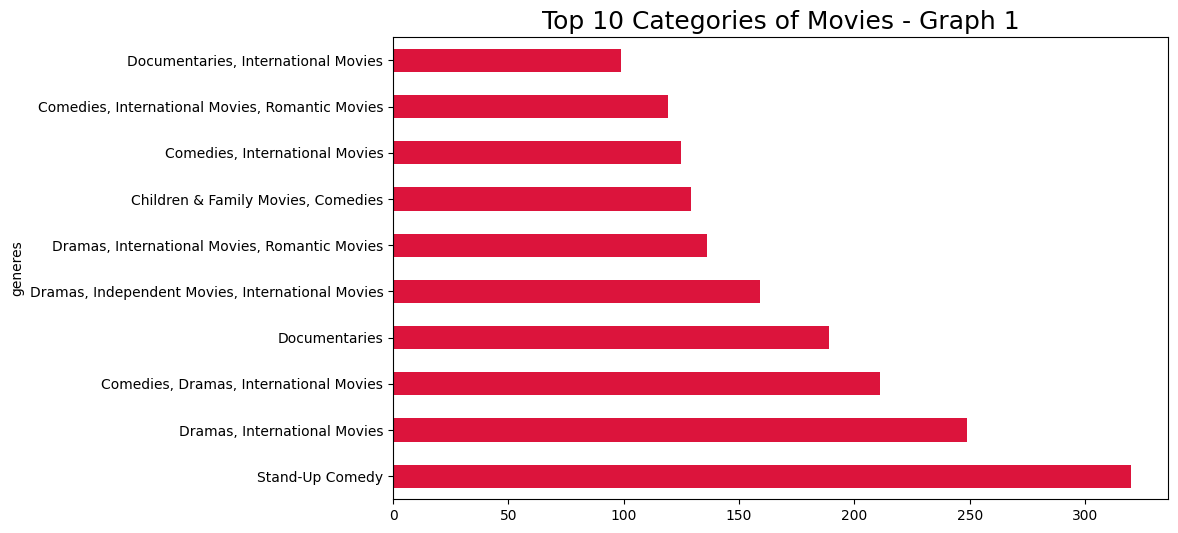

In [ ]:
# We will look at which Genres are the most popular for Movies
plt.figure(figsize=(10,6))
df[df["type"]=="Movie"]["generes"].value_counts()[:10].plot(kind="barh",color="crimson")
plt.title("Top 10 Categories of Movies - Graph 1",size=18);

The data shows that **Stand-Up Comedy**  is the largest category of movies.

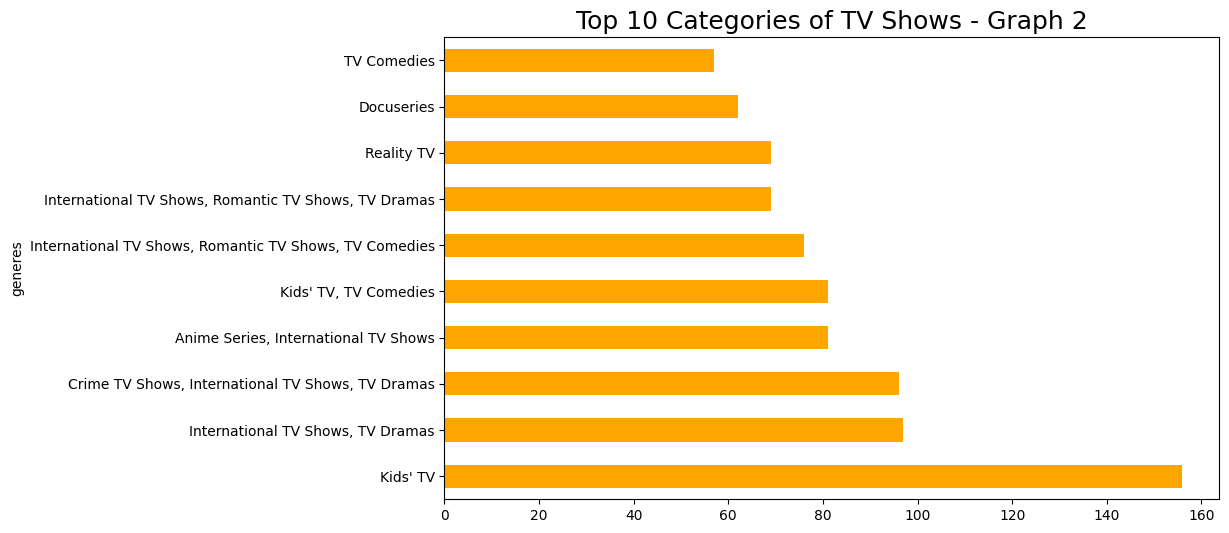

In [ ]:
# Doing same analysis for TV shows
plt.figure(figsize=(10,6))
df[df["type"]=="TV Show"]["generes"].value_counts()[:10].plot(kind="barh",color="orange")
plt.title("Top 10 Categories of TV Shows - Graph 2",size=18);

The data shows that Kids' Shows is the largest category of shows. The very high number of Kids TV shows may also be due to the fact that this type of content is cheaper to licence

In [ ]:
# Content each country provides
df_new = df.groupby(df["generes"])["country"].value_counts()
# Showing only the top 20 most produced genres per counrty.
df_new.sort_values(ascending=False).head(20).to_frame()


,,count
generes,country,
Stand-Up Comedy,United States,228
Documentaries,United States,141
"Comedies, Dramas, International Movies",India,95
Kids' TV,United States,86
"Children & Family Movies, Comedies",United States,74
"Anime Series, International TV Shows",Japan,68
"Dramas, International Movies",India,68
"Dramas, Independent Movies, International Movies",India,68
Reality TV,United States,64


 Due to the enormity of the data, we had to present it in a list and not in a graph form for readability reasons.

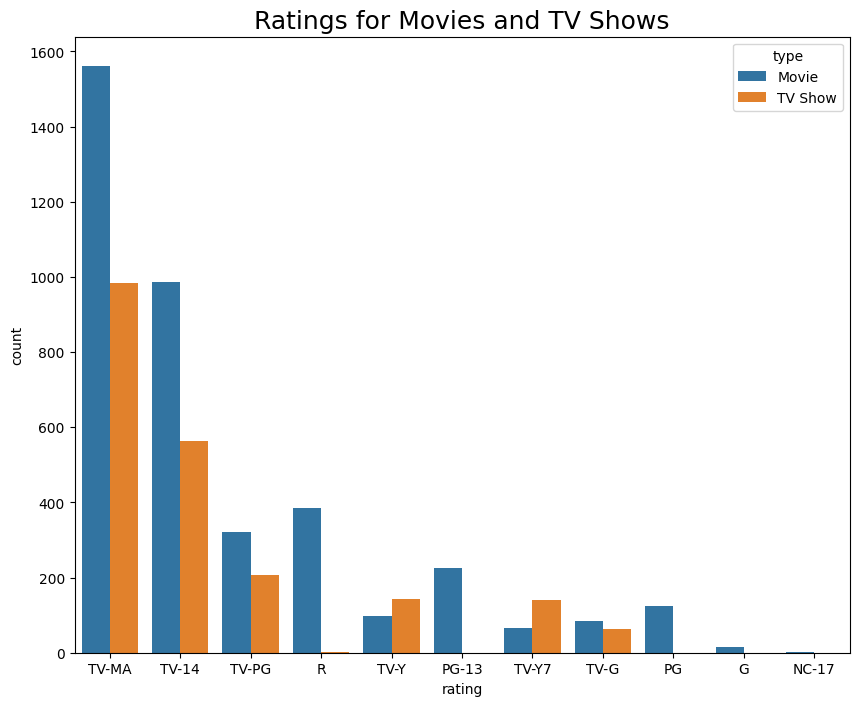

In [ ]:
plt.figure(figsize = (10,8))
# First plot every rating for movies and tv shows
sns.countplot(x="rating",data= df, hue= "type", order = df['rating'].value_counts().index[0:15])
plt.title('Ratings for Movies and TV Shows', size=18);

Clearly, Movies & TV Shows with a rating of TV-MA are in the clear majority. Next up is TV-14, TV-PG and R, which consists mostly of Movies.

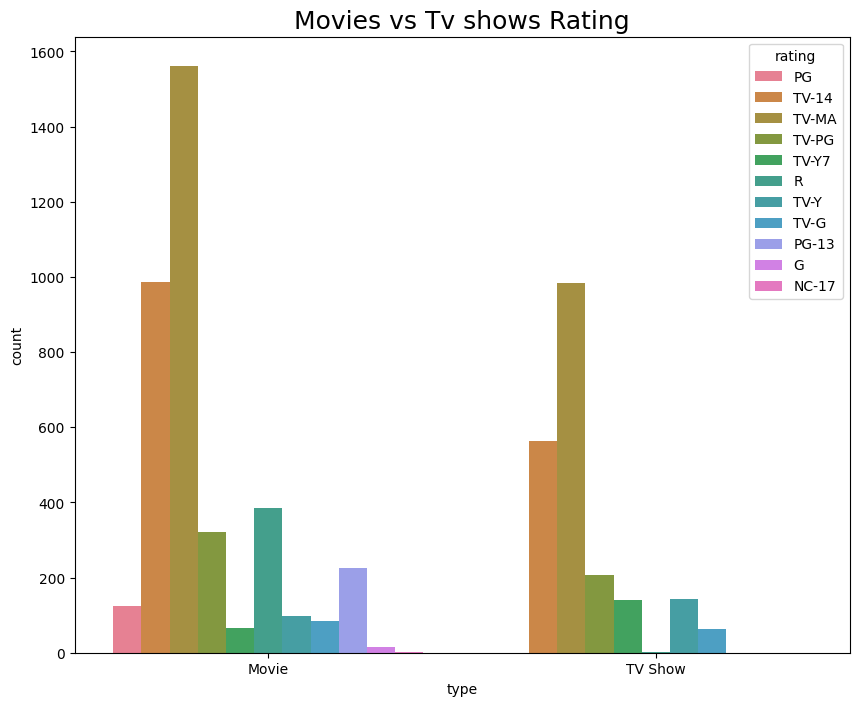

In [ ]:
plt.figure(figsize=(10,8))
# Then differentiate the ratings for Movies and TV Shows
sns.countplot(x='type',hue='rating',data=df)
plt.title("Movies vs Tv shows Rating", size=18);

We differenciated the Ratings of Movies & TV shows. From the graph, we see an almost 2:1 relation between the two categories.

<Axes: xlabel='type'>

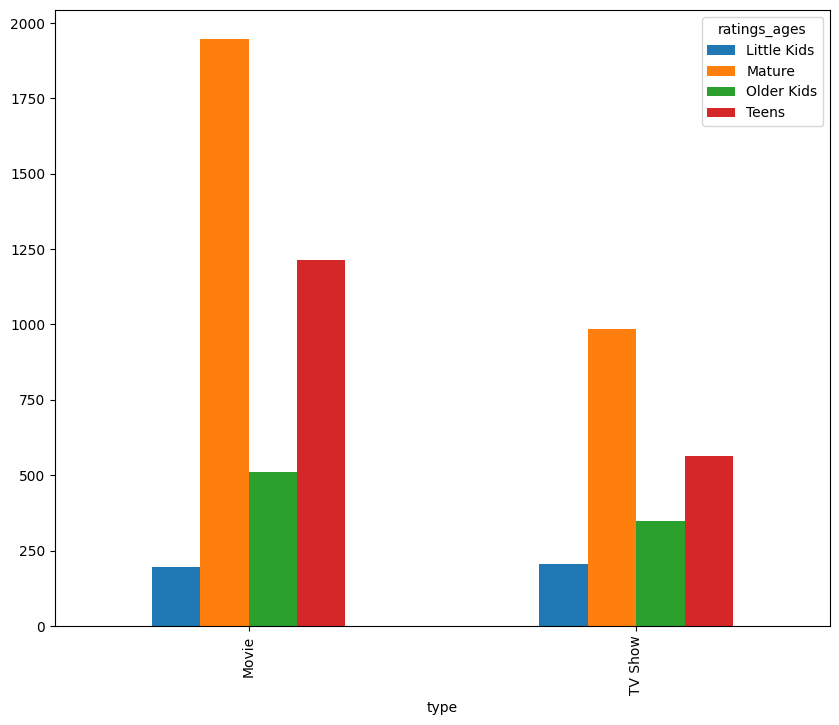

In [ ]:
# Creating a dictionary for ratings.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Mature',
    'TV-Y': 'Little Kids',
    'NR': 'Mature',
    'PG-13': 'Teens',
    'TV-G': 'Little Kids',
    'PG': 'Older Kids',
    'G': 'Little Kids',
    'UR': 'Mature',
    'NC-17': 'Mature'
}

# Add a new column 'rating_ages' to our dataframe based on the above dictionary
df["ratings_ages"] = df["rating"].replace(ratings_ages)

pd.crosstab(df["type"],df["ratings_ages"]).plot(kind="bar", figsize=(10,8))


We see that Netflix produces more **mature** content both in Movies and in TV Shows. Next is content that is for **Teens**. Older Kids and Little Kids come in last place.

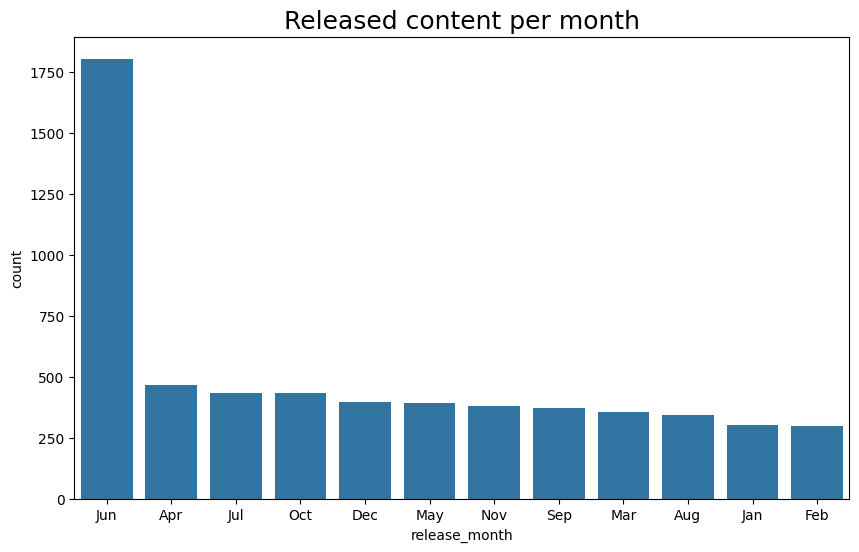

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df, order=df['release_month'].value_counts().index[0:12])
plt.title('Released content per month', size=18);

We can observe the most content is being released during the month of **June**.
This may be because educational institutions(schools & colleges) declare vacations in June.

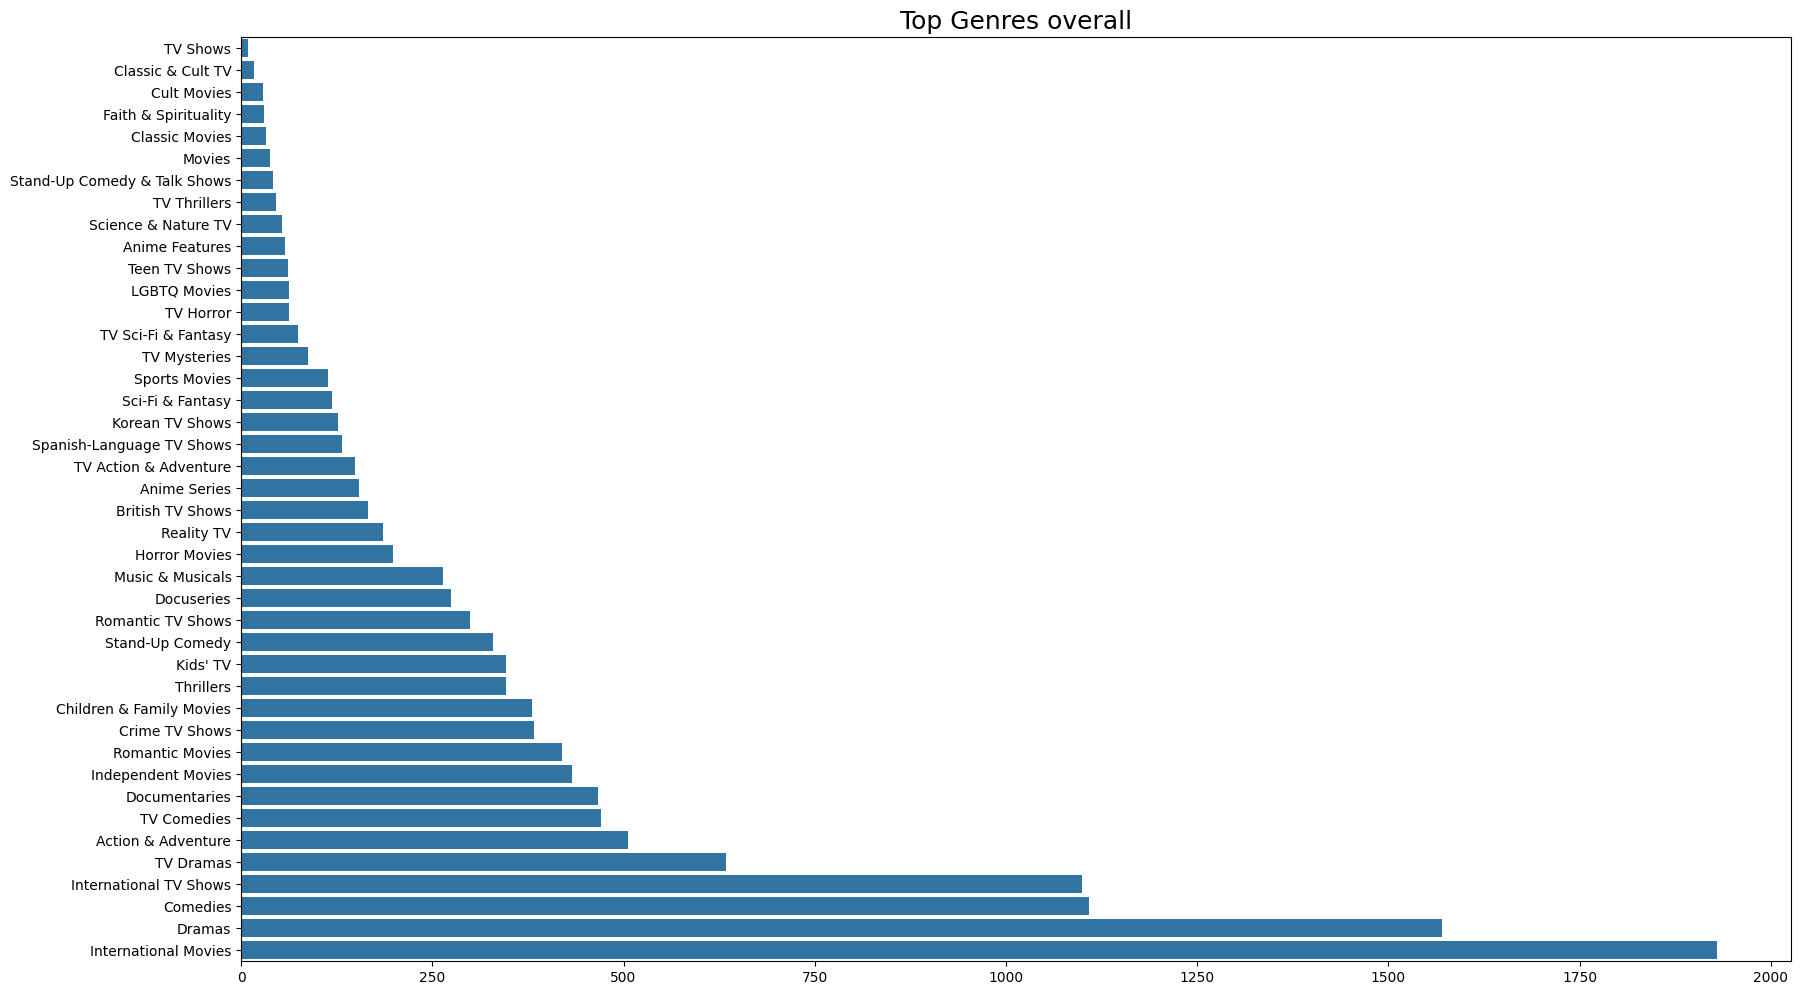

In [ ]:
categories = ", ".join(df['generes']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

plt.figure(figsize=(20,12))
sns.barplot(y=labels, x=values)
plt.title('Top Genres overall', size=18);

Since Netflix is a US based company but we know the most of the movies are released in India in the world, so the **International Movies** category has uncomparably huge numbers compared to the other categories.

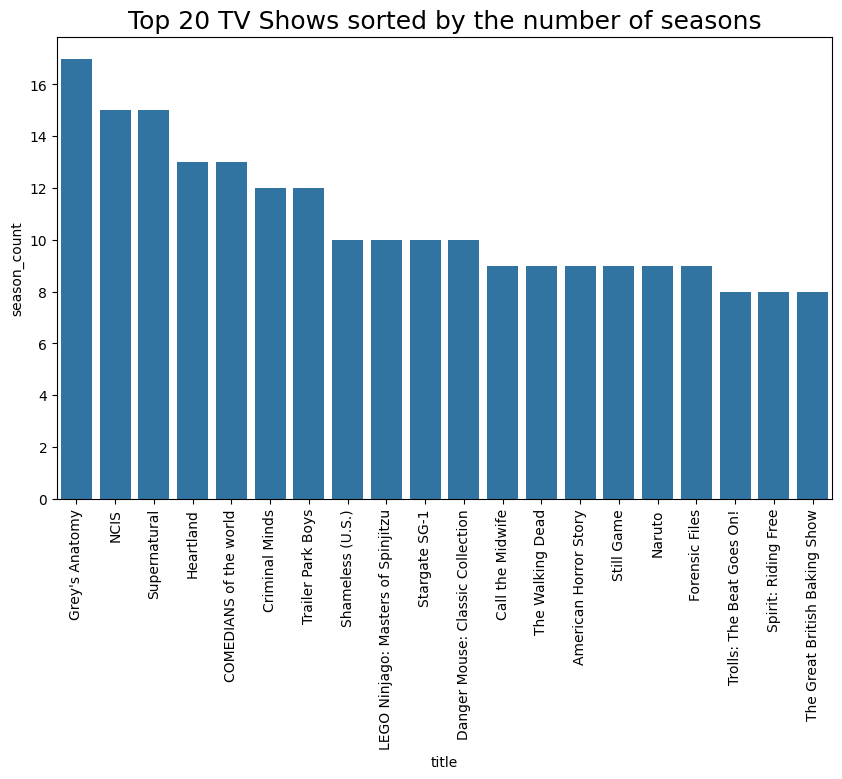

In [ ]:
# Create a new dataframe for TV Shows and their seasons.
season_df = df[df["type"]=="TV Show"]
season_df = season_df[['type', 'title', 'season_count']]
sorted = season_df.sort_values(by='season_count', ascending=False).reset_index(drop=True)

plt.figure(figsize = (10,6))
# Lets print the top 20 TV Shows by number of seasons.
top = 20
sns.barplot(x="title", y="season_count", data=sorted[0:top])
plt.xticks(rotation=90);
plt.title('Top 20 TV Shows sorted by the number of seasons', size=18);

The above graph shows the shows with the most seasons.

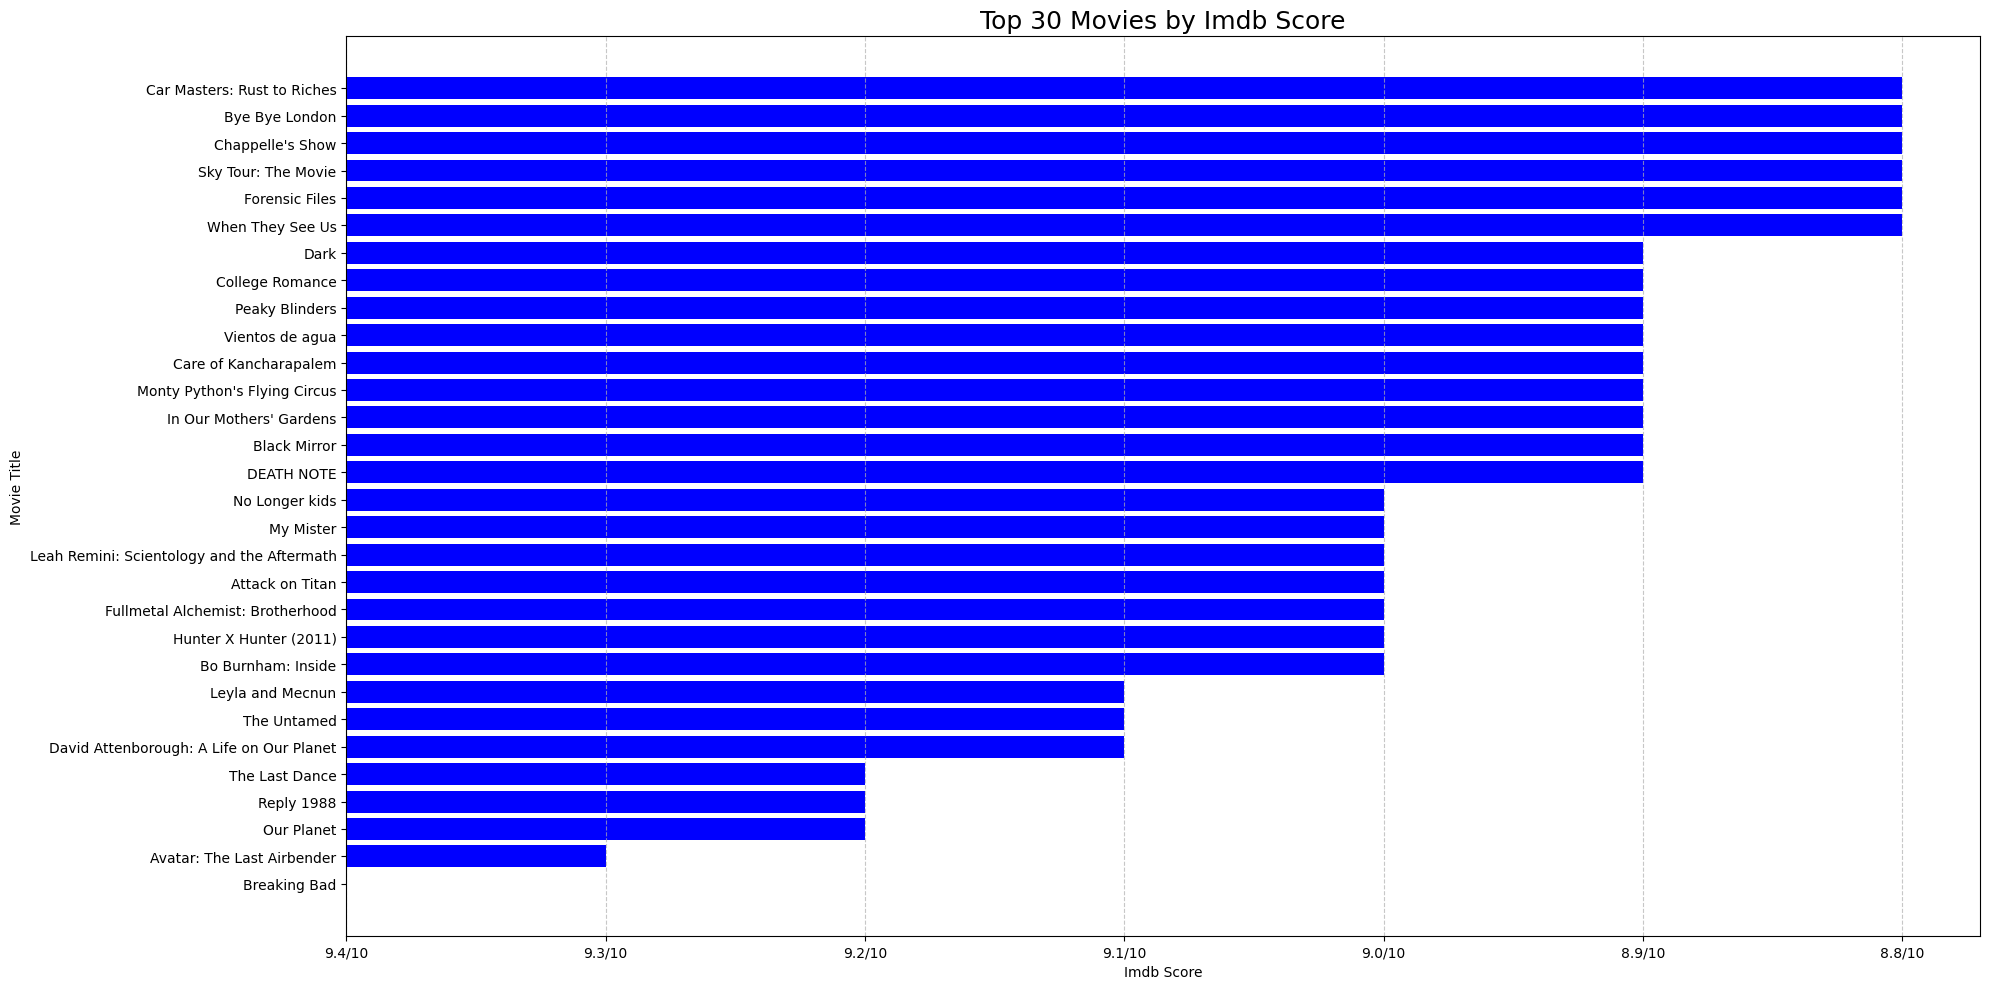

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Set the desired color (e.g., blue)
color = 'blue'

# Sort by Imdb Score (descending) and select top 30
top_movies = df.sort_values(by='Imdb Score', ascending=False).head(30)

# Create the plot
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plt.barh(top_movies['title'], top_movies['Imdb Score'], color=color)  # Horizontal bars

# Customize plot elements
plt.xlabel('Imdb Score')  # Update x-axis label
plt.ylabel('Movie Title')  # No change for horizontal bars
plt.title('Top 30 Movies by Imdb Score', size=18)  # Update title

# Optional: Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis for horizontal bars

plt.tight_layout()
plt.show()


The above plot shows the top 30 highest rated movies.

# **Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import numpy as np
import heapq
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import jaccard_score


In [ ]:
# Creating a new dataframe for this.
recommendation_df = df[['show_id', 'title', 'description']]

# Concat titles and descriptions.
recommendation_df['text'] = recommendation_df['title'] + ' ' + recommendation_df['description']
recommendation_df

<ipython-input-35-09f39a583cc1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,title,description,text
1626,4e63c129-aa79-4268-952f-bdfd51d893f4,Finding ‘Ohana,"In Oʻahu for the summer, two siblings from Bro...","Finding ‘Ohana In Oʻahu for the summer, two si..."
3589,caf213bf-cac3-434f-8d62-f5c1b0b56191,Oxygen,"After waking up in a cryogenic unit, Liz fight...","Oxygen After waking up in a cryogenic unit, Li..."
3620,1a70c85a-3ed8-4970-85e6-ee50a7b2cbf7,Paper Lives,"In the streets of Istanbul, ailing waste wareh...","Paper Lives In the streets of Istanbul, ailing..."
5091,a8951bda-a5d5-4f3a-a8f9-82e8cdb71ac2,The One,Love — and lies — spiral when a DNA researcher...,The One Love — and lies — spiral when a DNA re...
521,41400960-9c8e-4973-96ba-1cd363454c43,Baggio: The Divine Ponytail,"The story of Roberto Baggio, one of the best s...",Baggio: The Divine Ponytail The story of Rober...
...,...,...,...,...
1649,95315fd3-1598-4773-95eb-2fc85d733b91,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,Five Came Back: The Reference Films This colle...
3706,8a6d8125-7c0f-4ec0-85dd-e1c4fdaaa380,Pioneers: First Women Filmmakers*,This collection restores films from women who ...,Pioneers: First Women Filmmakers* This collect...
2790,8d2c9141-8232-4d3d-b68e-f65a6aff2b54,Louis C.K. 2017,"Louis C.K. muses on religion, eternal love, gi...","Louis C.K. 2017 Louis C.K. muses on religion, ..."
2791,17fd533b-799e-4d68-8af5-03ba8c14da0a,Louis C.K.: Hilarious,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.: Hilarious Emmy-winning comedy writ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'recommendation_df' is your DataFrame containing 'text'

# Define BOW with appropriate parameters
CountVec = CountVectorizer(
    ngram_range=(1, 2),  # Consider unigrams and bigrams
    stop_words='english',
    max_df=0.4,
    min_df=1,
    max_features=10000,
    lowercase=True
)

# Transform data (fit and transform)
bow_data = CountVec.fit_transform(recommendation_df['text'])

# Create DataFrame using the correct method
bow_dataframe = pd.DataFrame(bow_data.toarray(), columns=CountVec.get_feature_names_out())

# Print or use the DataFrame (bow_dataframe)
print(bow_dataframe)


      000  000 euros  000 prize  000 years  009  10  10 million  10 year  \
0       0          0          0          0    0   0           0        0   
1       0          0          0          0    0   0           0        0   
2       0          0          0          0    0   0           0        0   
3       0          0          0          0    0   0           0        0   
4       0          0          0          0    0   0           0        0   
...   ...        ...        ...        ...  ...  ..         ...      ...   
5962    0          0          0          0    0   0           0        0   
5963    0          0          0          0    0   0           0        0   
5964    0          0          0          0    0   0           0        0   
5965    0          0          0          0    0   0           0        0   
5966    0          0          0          0    0   0           0        0   

      10 years  100  ...  zeon  zero  zindagi  zoe  zombie  zombie apocalypse  \
0     

In [ ]:
#define tf-idf
tf_idf_vec = TfidfVectorizer(
                        use_idf=True,
                        ngram_range=(1,2), # (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams
                        max_features=10000,
                        max_df=0.4,    # drop words that occur in more than X percent of documents
                        min_df=1,      # only use words that appear at least X times
                        smooth_idf=True, # Prevents divide-by-zero errors
                        lowercase=True, # Convert everything to lower case
                        stop_words='english'
                        )
#transform
tf_idf_data = tf_idf_vec.fit_transform(recommendation_df['text'])

#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())
tf_idf_dataframe

,000,000 euros,000 prize,000 years,009,10,10 million,10 year,10 years,100,...,zeon,zero,zindagi,zoe,zombie,zombie apocalypse,zombies,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the cosine similarity matrix for all movies.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tf_idf_dataframe)


SciPy defines Jaccard distance as follows:

Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree where at least one of them is non-zero.

So it excludes the rows where both columns have
 values. jaccard_similarity_score doesn't. Hamming distance, on the other hand, is inline with the similarity definition:

The proportion of those vector elements between two n-vectors u and v which disagree.

So in order to calculate jaccard_similarity_score faster, we can use
: **1-hamming:**

Calculating the Jaccard/Tanimoto similarity matrix for all movies.

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

jac_sim = 1 - pairwise_distances(bow_dataframe, metric = "hamming")


Enumerating and indexing all Movies in the Dataframe.

In [ ]:
indices = pd.Series(recommendation_df.index, index=recommendation_df['title']).drop_duplicates()
indices

title
Finding ‘Ohana                          1626
Oxygen                                  3589
Paper Lives                             3620
The One                                 5091
Baggio: The Divine Ponytail              521
                                        ... 
Five Came Back: The Reference Films     1649
Pioneers: First Women Filmmakers*       3706
Louis C.K. 2017                         2790
Louis C.K.: Hilarious                   2791
Louis C.K.: Live at the Comedy Store    2792
Length: 5967, dtype: int64

Creating two dictionaries for storing for each movie the top 100 most similar movies. One dictionary for the BOW method and the other for the cosin method. This will provide easy access to our programm for future predicitons.

In [ ]:
# Dictionaries for both cosine_similarity matrix and jaccard_similarity matrix.
# For each movie store the top 100 most similar movies
jac_dict = {}
cos_dict = {}

for idx in indices:

  # Get the pairwise similarity scores of all movies with that movie
  score_array_jac = list(enumerate(jac_sim[idx]))
  score_array_cos = list(enumerate(cos_sim[idx]))

  # Sort the movies based on the similarity scores
  score_array_jac.sort(key=lambda x: x[1], reverse=True)
  score_array_cos.sort(key=lambda x: x[1], reverse=True)

  # Get the scores of the 100 most similar movies
  score_array_jac = score_array_jac[1:100+1]
  score_array_cos = score_array_cos[1:100+1]

  # Get the movie indices
  movie_indices_jac = [i[0] for i in score_array_jac]
  movie_indices_cos = [i[0] for i in score_array_cos]

  # Store the top 100 most similar movies
  jac_dict[idx] = recommendation_df['title'].iloc[movie_indices_jac]
  cos_dict[idx] = recommendation_df['title'].iloc[movie_indices_cos]



Our Recommendation funtion is **get_similar_movies1()**

In [ ]:
def get_similar_movies1(title, N, method='boolean'):
  idx = indices[title]

  if(method == 'boolean'):
    movie_array = jac_dict[idx]
    return movie_array.head(N)
  elif(method == 'tf-idf'):
    movie_array = cos_dict[idx]
    return movie_array.head(N)
  else:
    print('wrong method')
    return -1

In [ ]:
get_similar_movies1("Mortel", 10, 'boolean')

5246                                   The Tour
1967                                 Haraamkhor
2499                                      Katla
4061    Salam - The First ****** Nobel Laureate
592                              Being Napoleon
2655                                     Lechmi
4390                                   Spycraft
1397                           DRIFTING DRAGONS
3628                                 Paranormal
4141                Secrets of the Saqqara Tomb
Name: title, dtype: object

In [ ]:
get_similar_movies1("Mortel", 10, 'tf-idf')

1341                Dolemite Is My Name
5580                  Uncle Naji in UAE
3363                      Nasha Natasha
3458                           Occupied
1321                      Disappearance
3118    Miranda Sings Live…Your Welcome
4964                     The Last Czars
2486                          Kara Bela
2228                      In My Country
2499                              Katla
Name: title, dtype: object

We observe that there's no time difference between these two because the most similar movies for each movie have been precalculated, but each method yields different results. As you can see the "tf-idf" method yields more relatable results than the "BoW" method!

Here for the next recommendation function we will split the **recommendation_df** in **text_df** which only has the 'text' column

In [ ]:
text_df = recommendation_df['text']
text_df

1626    Finding ‘Ohana In Oʻahu for the summer, two si...
3589    Oxygen After waking up in a cryogenic unit, Li...
3620    Paper Lives In the streets of Istanbul, ailing...
5091    The One Love — and lies — spiral when a DNA re...
521     Baggio: The Divine Ponytail The story of Rober...
                              ...                        
1649    Five Came Back: The Reference Films This colle...
3706    Pioneers: First Women Filmmakers* This collect...
2790    Louis C.K. 2017 Louis C.K. muses on religion, ...
2791    Louis C.K.: Hilarious Emmy-winning comedy writ...
2792    Louis C.K.: Live at the Comedy Store The comic...
Name: text, Length: 5967, dtype: object

In [ ]:
def compute_jaccard_similarity(index, cv_dataframe=bow_dataframe):
  jaccard_sim = []
  for j in range(len(cv_dataframe.index)):
    jaccard_sim.append(jaccard_score(cv_dataframe.iloc[index], cv_dataframe.iloc[j], average='macro'))

  return jaccard_sim

Recommendation function get_similar_movies2()

In [115]:
def get_similar_movies2(text, N, method='boolean', text_df=text_df):

  # Create a new Series with the only item the description the user gave.
  d = {'text': text}
  text = pd.Series(data=d, index=['text'])
  # Concat the newly made df with the old one.
  new_text_df = pd.concat([text_df, text], ignore_index=True)

  if(method == 'boolean'):
    # Transform
    bow_data = CountVec.fit_transform(new_text_df)
    # Create Dataframe
    bow_dataframe=pd.DataFrame(bow_data.toarray(),columns=CountVec.get_feature_names_out())  # Use CountVec.get_feature_names()
    # Compute Jaccard Similarity for the last index (the description that the user gave)
    jac_sim = compute_jaccard_similarity(-1, bow_dataframe)
    score_array = list(enumerate(jac_sim))

  elif(method == 'tf-idf'):
    #transform
    tf_idf_data = tf_idf_vec.fit_transform(new_text_df)
    #create dataframe
    tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())
    # Get the pairwise similarity scores of all movies with that movie
    cosine_sim = cosine_similarity(tf_idf_dataframe)
    score_array = list(enumerate(cosine_sim[-1]))

  else:
    print('wrong method')
    return -1

  # Sort the movies based on the similarity scores
  score_array.sort(key=lambda x: x[1], reverse=True)
  # Get the scores of the 10 most similar movies
  score_array = score_array[1:N+1]
  # Get the movie indices
  movie_indices = [i[0] for i in score_array]

  # Return the top N most similar movies
  return recommendation_df['title'].iloc[movie_indices]


In [121]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse.csr import csr_matrix
import pandas as pd

# Assuming recommendation_df has 'text' and 'title' columns

def compute_jaccard_similarity(user_index, df):
  # Calculate Jaccard similarity for the user's description
  user_row = df.iloc[user_index]
  jaccard_sim = []
  for i in range(len(df)):
    if i != user_index:
      intersection = len(set(user_row) & set(df.iloc[i]))
      union = len(set(user_row) | set(df.iloc[i]))
      jaccard_sim.append(intersection / union)
  return jaccard_sim

def get_similar_movies2(text, N, method='boolean', text_df=text_df):

  # Create a DataFrame from the user's query (corrected line)
  user_text_df = pd.DataFrame({'text': [text]})

  # Concatenate the newly made df with the old one
  new_text_df = pd.concat([text_df, user_text_df], ignore_index=True)

  # ... (rest of the function using new_text_df)

  if method == 'boolean':
    # Transform data (ensure correct object for CountVec)
    bow_data = CountVec.fit_transform(new_text_df['text'])  # Use 'text' column
    # Create DataFrame with feature names
    bow_dataframe = pd.DataFrame(bow_data.toarray(), columns=CountVec.get_feature_names_out())

    # Compute Jaccard Similarity for the last index
    jac_sim = compute_jaccard_similarity(-1, bow_dataframe)
    score_array = list(enumerate(jac_sim))

  elif method == 'tf-idf':
    # Transform data
    tf_idf_data = tf_idf_vec.fit_transform(new_text_df['text'])  # Use 'text' column
    # Create DataFrame with feature names
    tf_idf_dataframe = pd.DataFrame(tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names_out())

    # Get pairwise similarity scores
    cosine_sim = cosine_similarity(tf_idf_dataframe)
    score_array = list(enumerate(cosine_sim[-1]))

  else:
    print('wrong method')
    return -1

  # Sort and get movie indices
  score_array.sort(key=lambda x: x[1], reverse=True)
  score_array = score_array[1:N+1]
  movie_indices = [i[0] for i in score_array]

  # Return top N similar movies (handle potential absence of titles)
  if len(movie_indices) > 0:
    return recommendation_df['title'].iloc[movie_indices]
  else:
    print(f"No similar movies found for '{text}'.")
    return None




<ipython-input-121-4cda5729c240>:2: DeprecationWarning:

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.



In [122]:
get_similar_movies2("Baahubali 2: The Conclusion", 10, 'boolean')

3589         Oxygen
3620    Paper Lives
5091        The One
Name: title, dtype: object

In [123]:
get_similar_movies2("war between vietnam and usa", 10, 'tf-idf')

1626    Finding ‘Ohana
3589            Oxygen
3620       Paper Lives
Name: title, dtype: object

Here, we see that **tf-idf method** gives more accurate recommendations than **boolean method**.

 **Jaccard similarity** is extremely time consuming while **cosine similarity** which seems to be lightning fast! So tf-idf is for sure the best method to use, given the fact that is more accurate and less time consuming.

 We also witnessed the superiority of tf-idf. Even with so little information it yields many relatable results. On the other hand the "BoW" method struggles to keep up, as it takes much more time to calculate the jaccard similarity than the cosine similarity and yields dissatisfactory results in the end.

In [124]:
# Thanks for your time!!